In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# , GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from imblearn.pipeline import Pipeline


In [2]:
stroke_risk = pd.read_csv('../00-data/healthcare-dataset-stroke-data.csv')

stroke_risk

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
to_remove = ['id']
to_1he = ['work_type', 'smoking_status']
to_01 = ['gender', 'Residence_type', 'ever_married']
to_normalize = ['age', 'avg_glucose_level', 'bmi']

mapping_dict = {
    'gender': {'Male': 1, 'Female': 0},
    'Residence_type': {'Urban': 1, 'Rural': 0},
    'ever_married': {'Yes': 1, 'No': 0}
}

In [4]:
stroke_risk_cp  = stroke_risk.copy()
stroke_risk_cp = stroke_risk_cp.drop(to_remove, axis=1)
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
stroke_risk_cp = pd.get_dummies(stroke_risk_cp, columns=to_1he, drop_first=True, dtype=int)
for col in to_01:
  stroke_risk_cp[col] = stroke_risk_cp[col].map(mapping_dict[col])

In [6]:
stroke_risk_cp

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
1,0.0,61.0,0,0,1,0,202.21,NaN,1,0,0,1,0,0,1,0
2,1.0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0.0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0.0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,80.0,1,0,1,1,83.75,NaN,0,0,1,0,0,0,1,0
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,1,0
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,1,0
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,1,0,0


In [7]:
stroke_risk_cp.isnull().sum()

gender                              1
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64

In [8]:
stroke_cleaned = stroke_risk_cp[~stroke_risk_cp['bmi'].isnull()]
stroke_cleaned_null = ~stroke_risk_cp['gender'].isnull()
stroke_cleaned = stroke_cleaned[stroke_cleaned_null]

stroke_cleaned

C:\Users\David\AppData\Local\Temp\ipykernel_36512\2759396873.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stroke_cleaned = stroke_cleaned[stroke_cleaned_null]


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1,0,0
2,1.0,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,1,0
3,0.0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,1
4,0.0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,1,0
5,1.0,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.0,13.0,0,0,0,0,103.08,18.6,0,0,0,0,1,0,0,0
5106,0.0,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0,1,0
5107,0.0,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0,1,0
5108,1.0,51.0,0,0,1,0,166.29,25.6,0,0,1,0,0,1,0,0


In [9]:
stroke_cleaned.isnull().sum()

gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
stroke                            0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [10]:
X = stroke_cleaned.drop('stroke', axis=1).values
y = stroke_cleaned['stroke'].values

In [11]:
X

array([[ 1., 67.,  0., ...,  1.,  0.,  0.],
       [ 1., 80.,  0., ...,  0.,  1.,  0.],
       [ 0., 49.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 0., 35.,  0., ...,  0.,  1.,  0.],
       [ 1., 51.,  0., ...,  1.,  0.,  0.],
       [ 0., 44.,  0., ...,  0.,  0.,  0.]], shape=(4908, 15))

In [12]:
y

array([1, 1, 1, ..., 0, 0, 0], shape=(4908,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [14]:
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (3435, 15), X_test: (1473, 15), y_train: (3435,), y_test: (1473,)


In [15]:
svc = LinearSVC()
svc.fit(X_train, y_train)

print(f'score train: {svc.score(X_train, y_train)}, score test: {svc.score(X_test, y_test)}')

score train: 0.9601164483260554, score test: 0.9511201629327902


apparentemente la precisione è alta, ma proviamo a verificare con la matrice di confusione

In [16]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

In [17]:
def calculate_perc (part, np):
  return 0 if part == 0 | np == 0 else 100*part/(part+np)

In [18]:
def create_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    labels = np.asarray(["{0}\n({1:.1%})".format(value, percentage)
                         for value, percentage in zip(cm.flatten(), cm_percent.flatten())])
    labels = labels.reshape(cm.shape)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False,
                xticklabels=['Predizione 0', 'Predizione 1'],
                yticklabels=['Verità 0', 'Verità 1'])
    
    plt.xlabel('Previsione')
    plt.ylabel('Verità')
    plt.title('Matrice di Confusione (Percentuali sulla Riga)')
    plt.show()
    tn, fp, fn, tp = cm.ravel()
    
    return [calculate_perc(tn, fp), calculate_perc(fp, tn), calculate_perc(fn, tp), calculate_perc(tp, fn)]


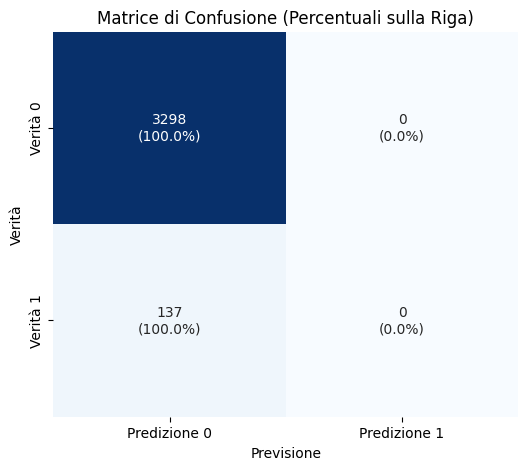

[np.float64(100.0), np.float64(0.0), np.float64(100.0), np.float64(0.0)]

In [19]:
create_confusion_matrix(y_train, y_train_pred)

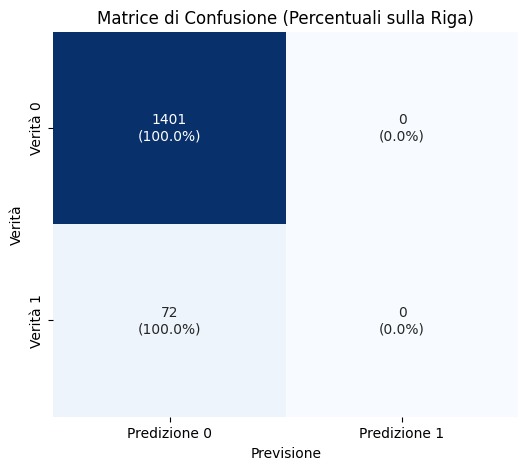

[np.float64(100.0), np.float64(0.0), np.float64(100.0), np.float64(0.0)]

In [20]:
create_confusion_matrix(y_test, y_test_pred)

il modello overfitta su 0, proviamo a rifare il processo con un modello regolarizzato e pensato per le classi bilanciate

In [21]:
svcBalanced = LinearSVC('l2', class_weight='balanced')
svcBalanced.fit(X_train, y_train)

print(f'score train: {svcBalanced.score(X_train, y_train)}, score test: {svcBalanced.score(X_test, y_test)}')

score train: 0.7251819505094614, score test: 0.7345553292600135


In [22]:
y_train_pred_balanced = svcBalanced.predict(X_train)
y_test_pred_balanced = svcBalanced.predict(X_test)

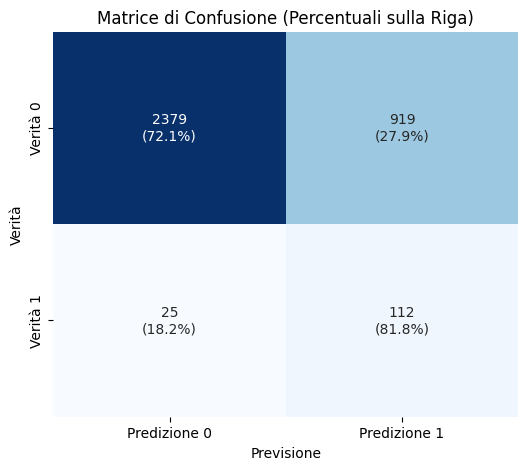

[np.float64(72.13462704669497),
 np.float64(27.865372953305034),
 np.float64(18.248175182481752),
 np.float64(81.75182481751825)]

In [23]:
create_confusion_matrix(y_train, y_train_pred_balanced)

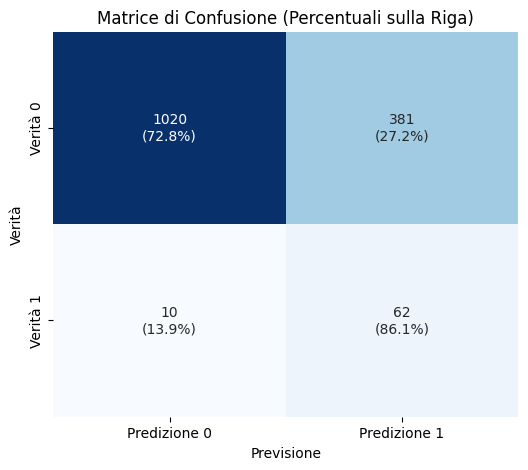

[np.float64(72.8051391862955),
 np.float64(27.194860813704498),
 np.float64(13.88888888888889),
 np.float64(86.11111111111111)]

In [24]:
create_confusion_matrix(y_test, y_test_pred_balanced)

Sicuramente con i parametri 'l2' e class_weight='balanced' abbiamo ottenuto risultati molto migliori. Ora avrebbe senso provare varie combinazioni per vedere se riusciamo a migliorare ancora di piu il modello

score train: 0.7248908296943232, score test: 0.7345553292600135


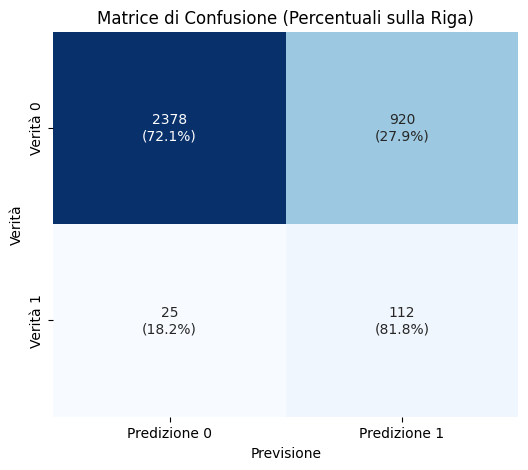

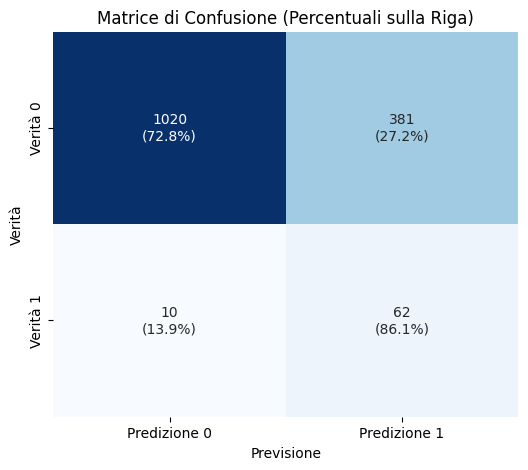

[np.float64(72.8051391862955),
 np.float64(27.194860813704498),
 np.float64(13.88888888888889),
 np.float64(86.11111111111111)]

In [25]:
svcBalanced = LinearSVC('l1', class_weight='balanced')
svcBalanced.fit(X_train, y_train)

print(f'score train: {svcBalanced.score(X_train, y_train)}, score test: {svcBalanced.score(X_test, y_test)}')

y_train_pred_balanced = svcBalanced.predict(X_train)
y_test_pred_balanced = svcBalanced.predict(X_test)

create_confusion_matrix(y_train, y_train_pred_balanced)
create_confusion_matrix(y_test, y_test_pred_balanced)

score train: 0.7251819505094614, score test: 0.7345553292600135


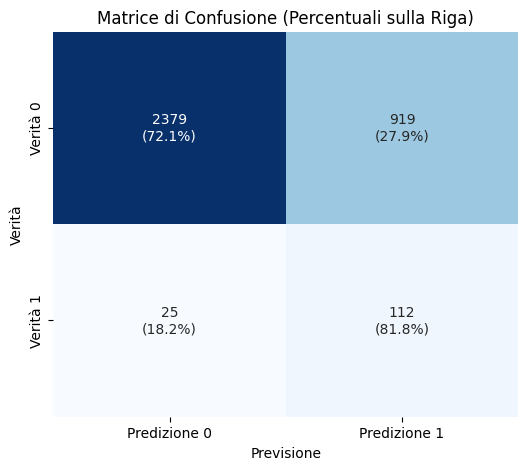

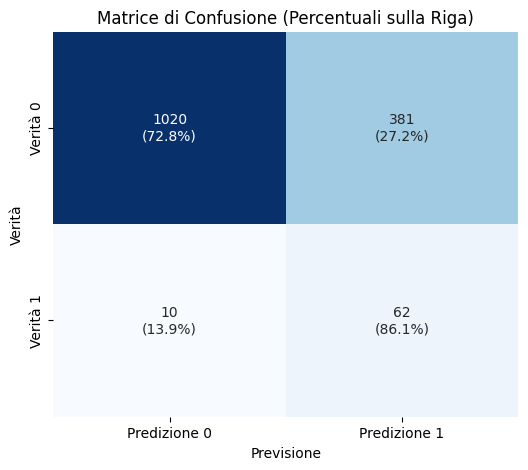

[np.float64(72.8051391862955),
 np.float64(27.194860813704498),
 np.float64(13.88888888888889),
 np.float64(86.11111111111111)]

In [26]:
svcBalanced = LinearSVC(class_weight='balanced')
svcBalanced.fit(X_train, y_train)

print(f'score train: {svcBalanced.score(X_train, y_train)}, score test: {svcBalanced.score(X_test, y_test)}')

y_train_pred_balanced = svcBalanced.predict(X_train)
y_test_pred_balanced = svcBalanced.predict(X_test)

create_confusion_matrix(y_train, y_train_pred_balanced)
create_confusion_matrix(y_test, y_test_pred_balanced)

i risultati sembrano essere indipendenti dalla regolarizzazione, ragion per cui non la considererò su come migliorare

min_age: 0
score train: 0.7320427916454406, score test: 0.7460964019008826


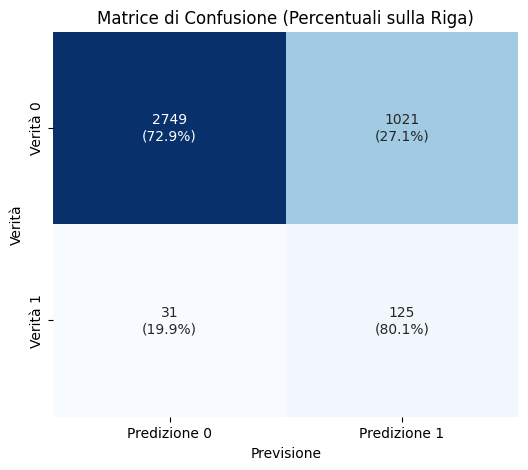

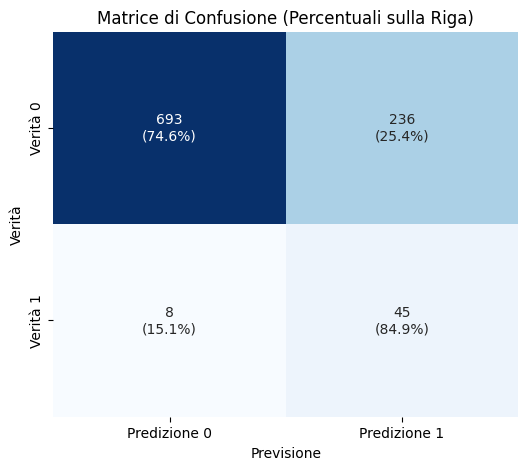

-------------------------------------------------------
min_age: 10
score train: 0.7291373981455465, score test: 0.7630685675492193


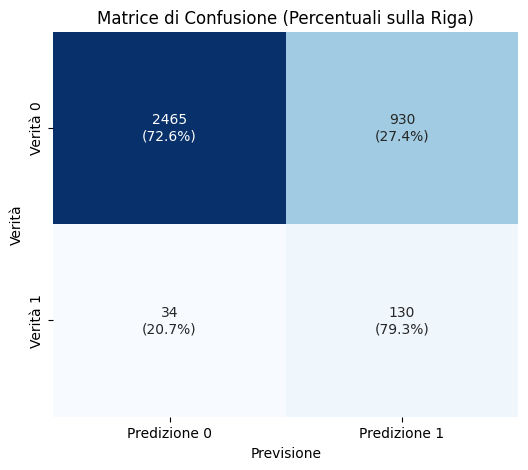

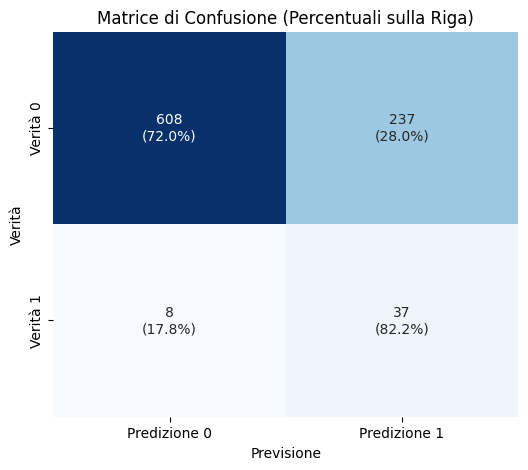

-------------------------------------------------------
min_age: 18
score train: 0.710776788455634, score test: 0.7712152070604209


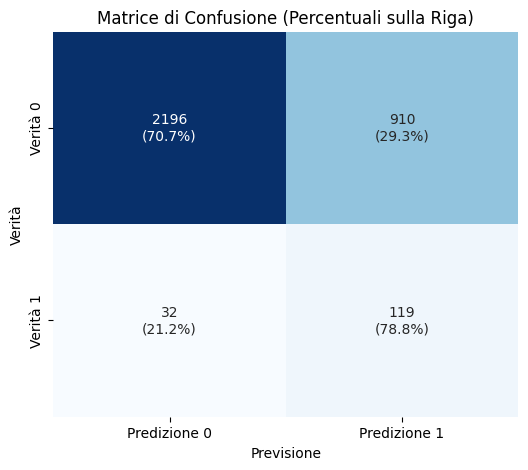

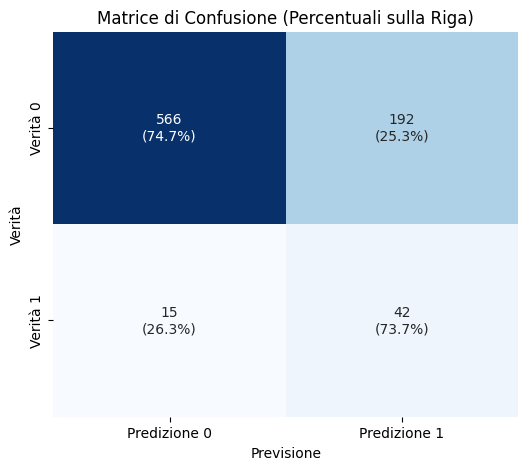

-------------------------------------------------------
min_age: 45
score train: 0.6772378516624041, score test: 0.8343516632722335


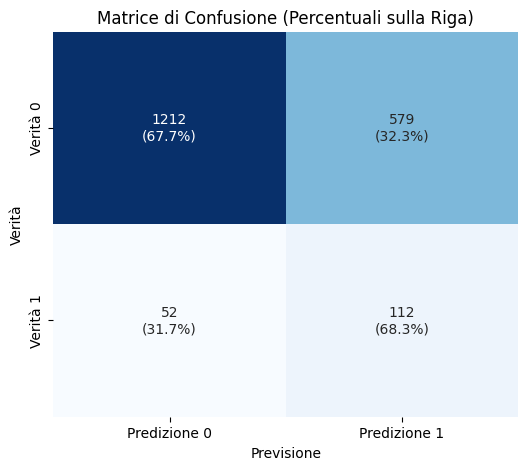

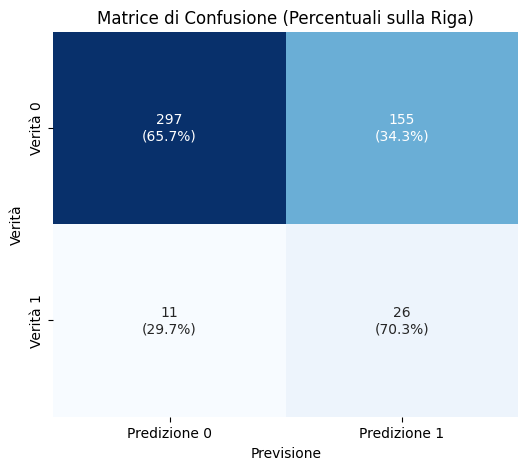

-------------------------------------------------------
min_age: 50
score train: 0.6465311004784688, score test: 0.8520027155465038


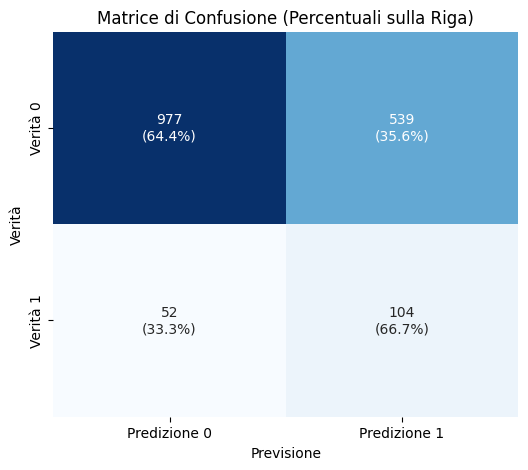

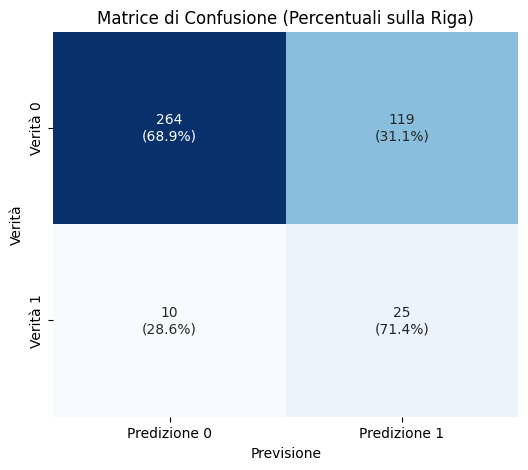

-------------------------------------------------------
min_age: 55
score train: 0.6474981329350261, score test: 0.8710115410726409


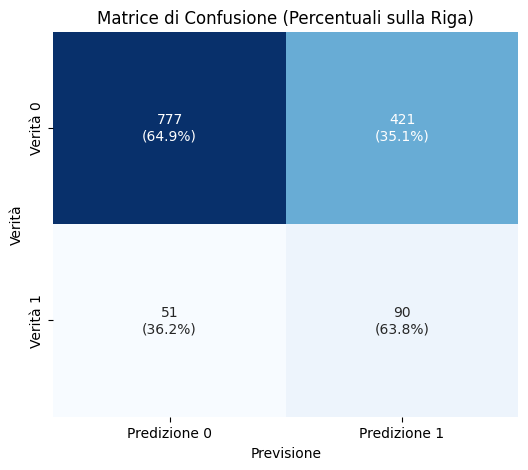

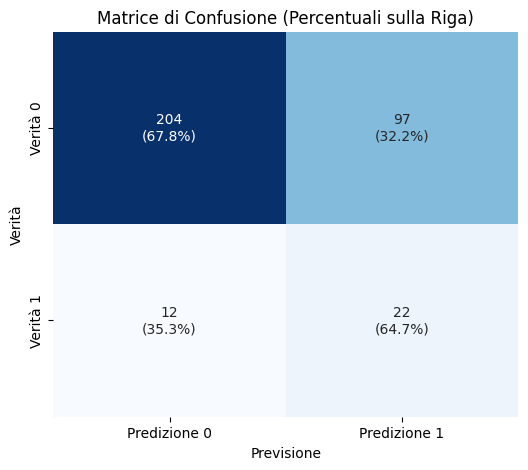

-------------------------------------------------------
min_age: 60
score train: 0.6478599221789884, score test: 0.8940936863543788


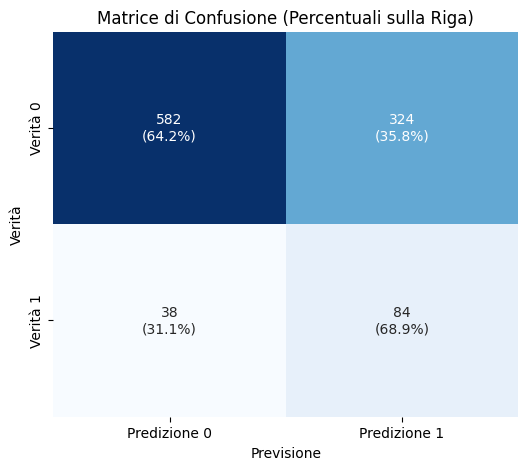

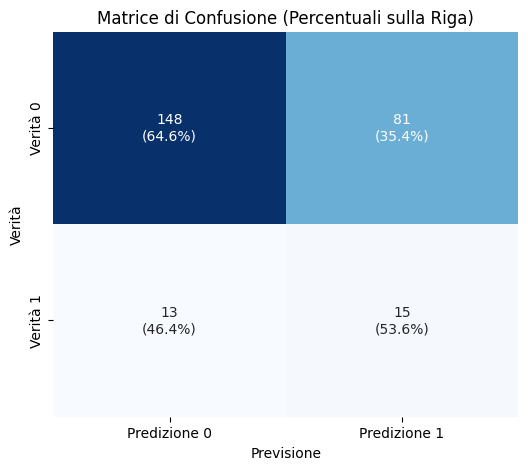

-------------------------------------------------------
min_age: 65
score train: 0.6666666666666666, score test: 0.9144602851323829


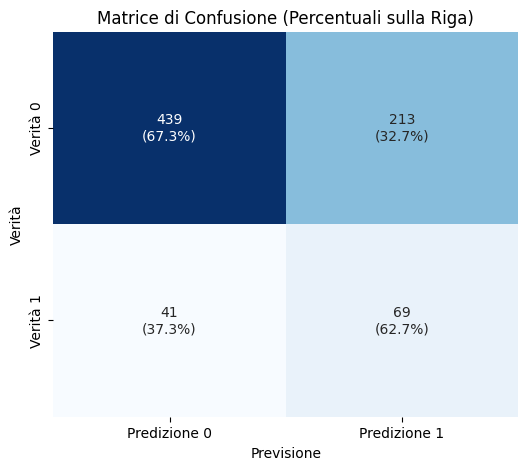

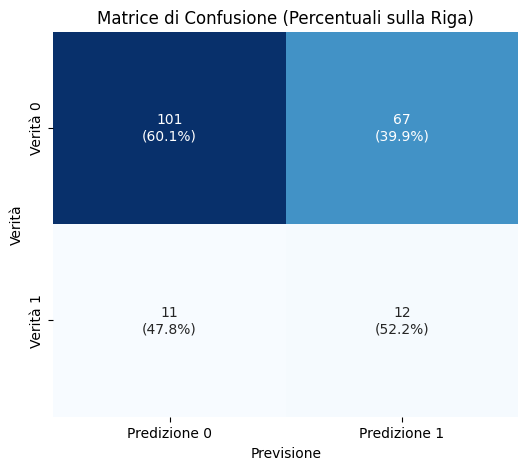

-------------------------------------------------------
min_age: 70
score train: 0.6528776978417267, score test: 0.9049558723693143


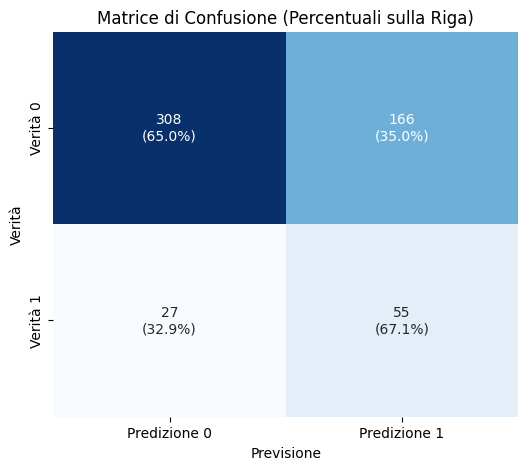

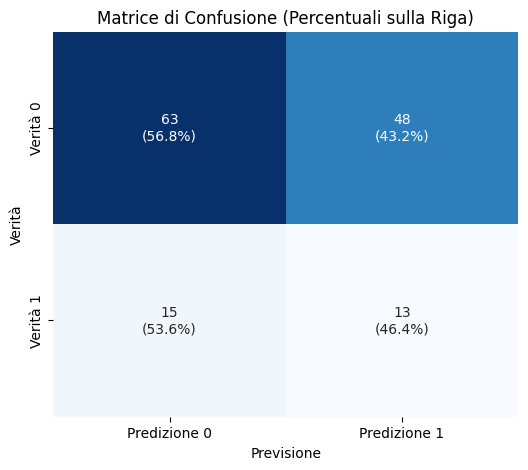

-------------------------------------------------------
min_age: 75
score train: 0.6161879895561357, score test: 0.9049558723693143


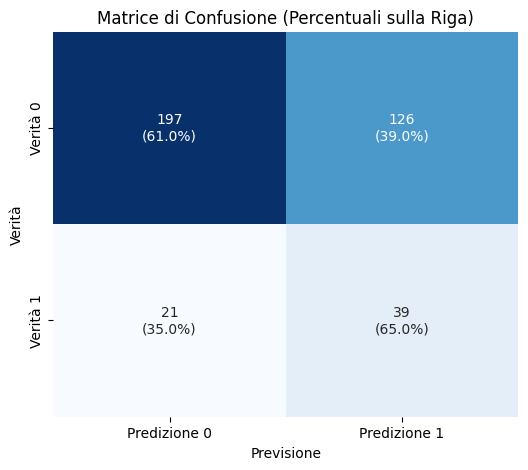

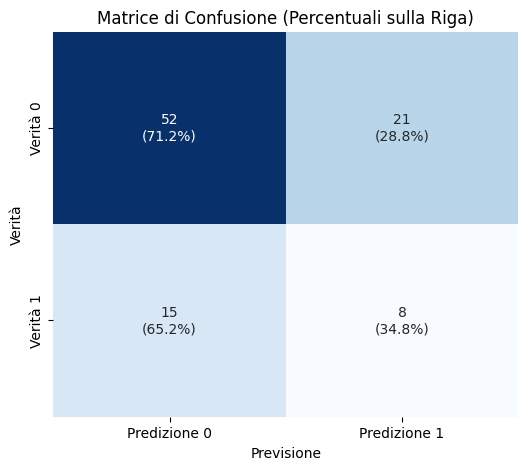

-------------------------------------------------------
min_age: 80
score train: 0.6482758620689655, score test: 0.5743380855397149


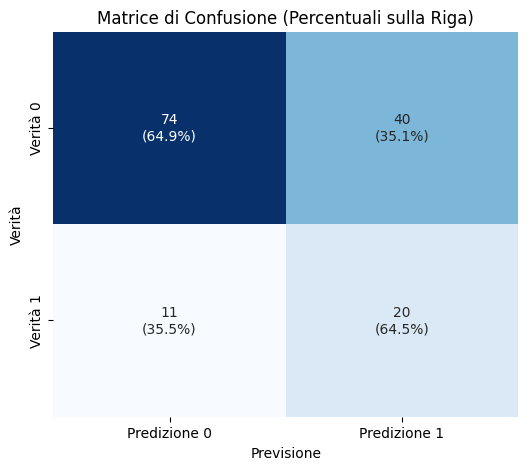

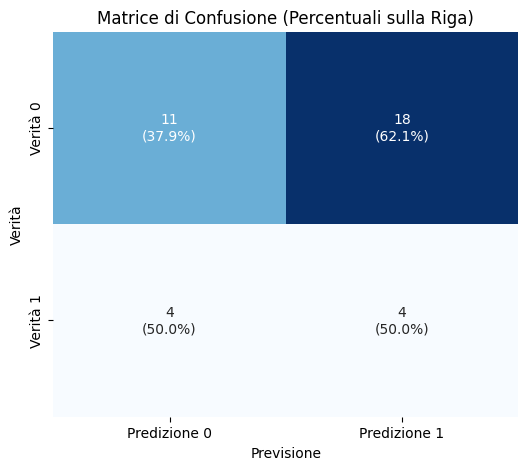

-------------------------------------------------------


In [27]:
min_ages = [0, 10, 18, 45,50,55,60, 65, 70, 75, 80]
precisions_train = []

precisions_test = []

for min_age in min_ages:
  print(f'min_age: {min_age}')
  stroke_risk_year = stroke_cleaned[stroke_cleaned['age'] >= min_age]
  
  X_year = stroke_cleaned[stroke_cleaned['age'] >= min_age].drop(['stroke'], axis=1).values
  y_year = stroke_cleaned[stroke_cleaned['age'] >= min_age]['stroke'].values

  X_train_year, X_test_year, y_train_year, y_test_year = train_test_split(X_year, y_year, test_size=0.2, random_state=42)

  svcAges = LinearSVC(class_weight='balanced')
  svcAges.fit(X_train_year, y_train_year)

  print(f'score train: {svcAges.score(X_train_year, y_train_year)}, score test: {svcAges.score(X_test, y_test)}')

  y_train_pred_ages = svcAges.predict(X_train_year)
  y_test_pred_ages = svcAges.predict(X_test_year)
  

  tn_train,fp_train,fn_train,tp_train = create_confusion_matrix(y_train_year, y_train_pred_ages)
  precisions_train.append((min_age, tn_train, fp_train, fn_train, tp_train))
  
  tn_test,fp_test,fn_test,tp_test = create_confusion_matrix(y_test_year, y_test_pred_ages)
  precisions_test.append((min_age, tn_test, fp_test, fn_test, tp_test))

  print('-------------------------------------------------------')


In [28]:
def print_plot_01 (title, values):
  plt.figure(figsize=(10,6))
  # for p in values:
  ages = np.array([p[0] for p in values])
  p0 = np.array([p[1] for p in values])
  p1 = np.array([p[2] for p in values])
  p2 = np.array([p[3] for p in values])
  p3 = np.array([p[4] for p in values])
  
  plt.plot(ages, p0, marker='x', linestyle='--', color='skyblue', label='true negatives')
  plt.plot(ages, p1, marker='x', linestyle='--', color='salmon', label='false positives')
  plt.plot(ages, p2, marker='x', linestyle='--', color='grey', label='false negatives')
  plt.plot(ages, p3, marker='x', linestyle='--', color='green', label='true positives')

  
  plt.title(title)
  plt.legend()
  plt.xticks(ages)
  plt.ylim(0, 100)
  
  plt.show()
    

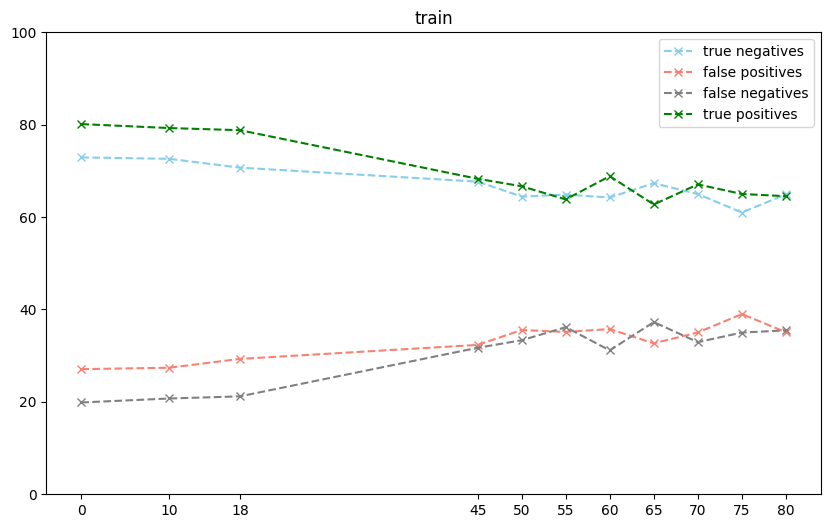

In [29]:
print_plot_01('train',precisions_train)

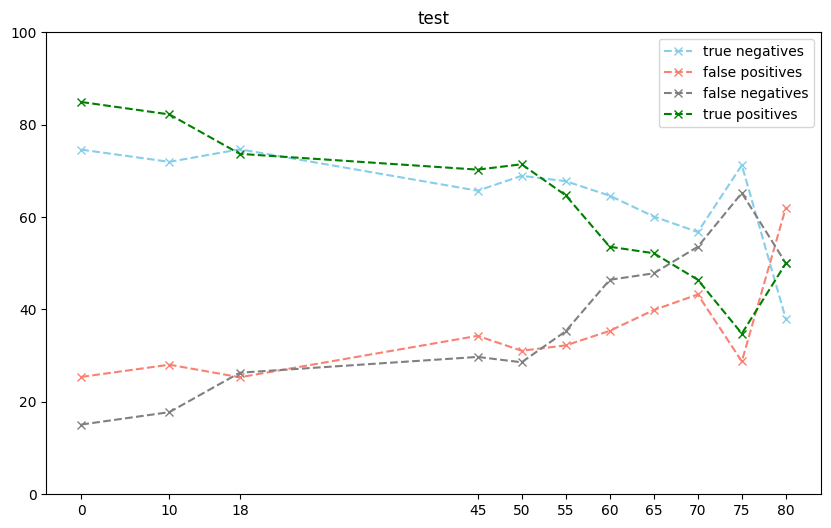

In [30]:
print_plot_01('test',precisions_test)

il modello sembra trovare positivi e negativi con buona precisione già da 0 anni, anzi, proprio basandoci su tutto il dataset otteniamo i migliori risultati.
Dalle analisi effettuate credo che basarsi su un svm con classi bilanciate sia un buon modo per creare un modello di predizione per gli ictus.
Parto quindi da tutti i dati, vediamo come varia la sensibilità di questi dati al variare dell'età

min_age: 0 - 45


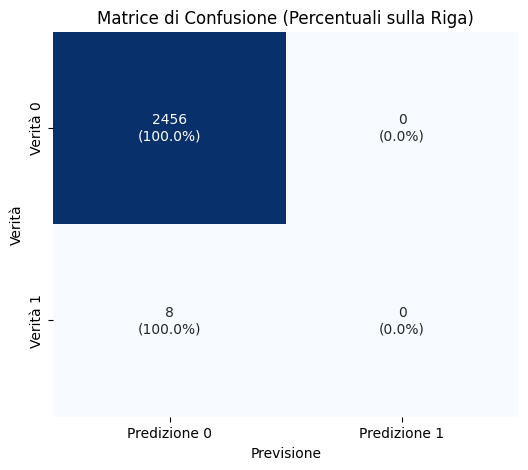

-------------------------------------------------------
min_age: 45 - 50


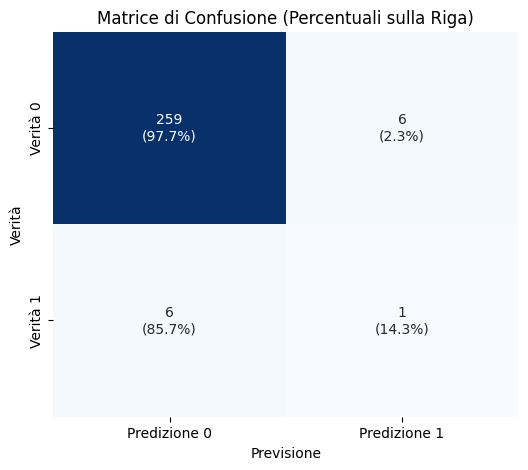

-------------------------------------------------------
min_age: 50 - 55


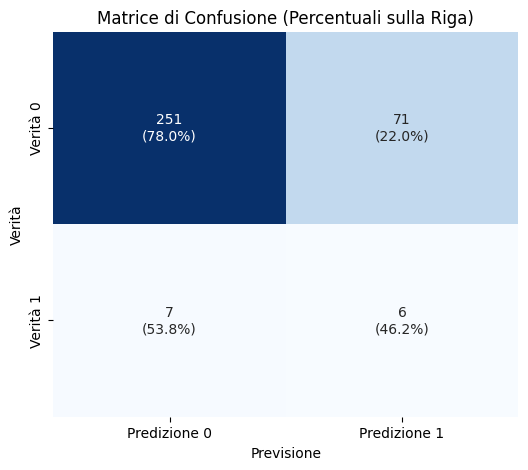

-------------------------------------------------------
min_age: 55 - 60


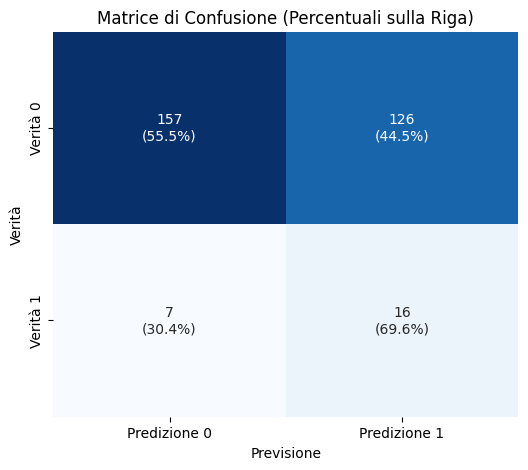

-------------------------------------------------------
min_age: 60 - 65


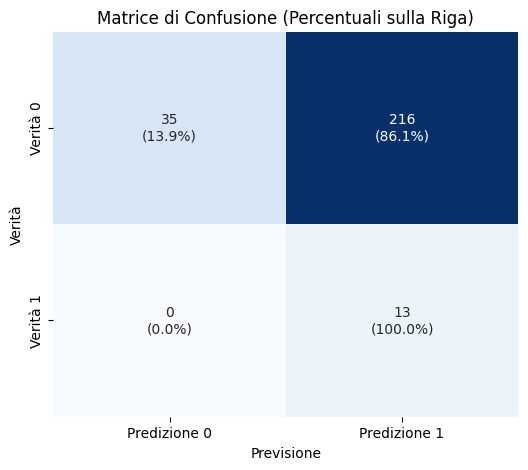

-------------------------------------------------------
min_age: 65 - 70


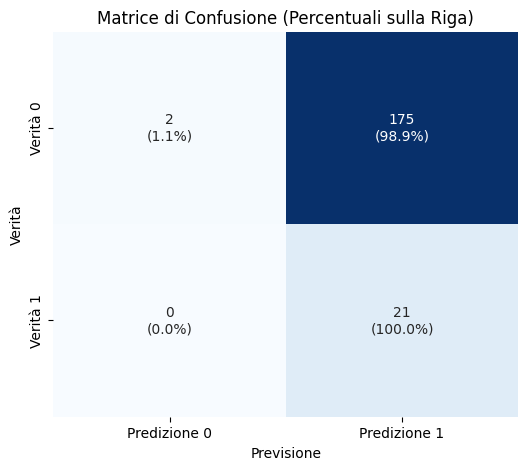

-------------------------------------------------------
min_age: 70 - 75


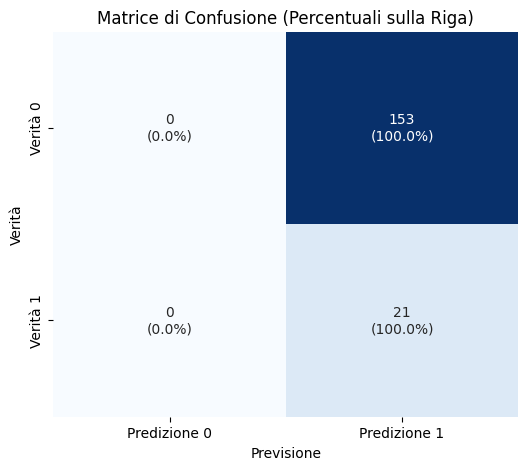

-------------------------------------------------------
min_age: 75 - 80


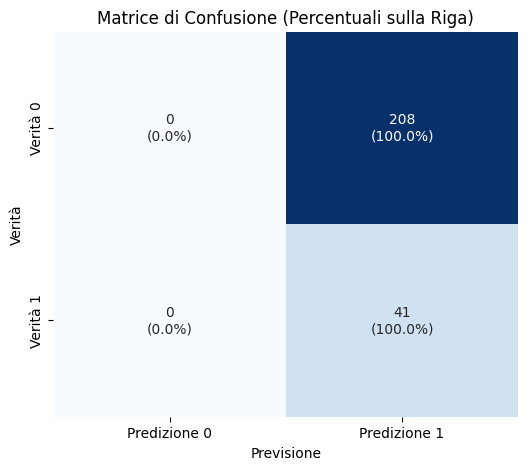

-------------------------------------------------------
min_age: 80 - 120


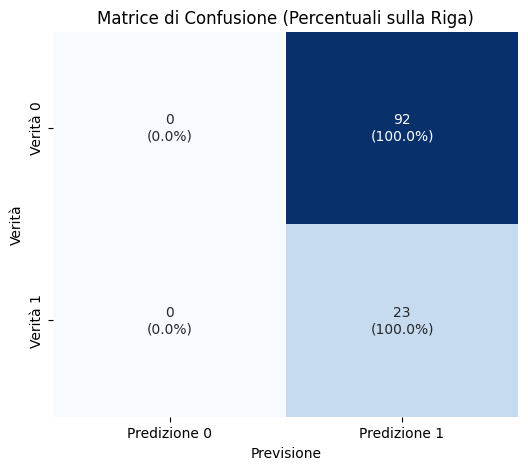

-------------------------------------------------------


In [31]:
tresholds = [ 45,50,55,60, 65, 70, 75, 80, 120]
prev_treshold = 0

precisions = []

svcAges = LinearSVC(class_weight='balanced')
svcAges.fit(X_train, y_train)

for treshold in tresholds:
  print(f'min_age: {prev_treshold} - {treshold}')
  stroke_risk_year = stroke_cleaned[(treshold-1 >= stroke_cleaned['age']) & (stroke_cleaned['age'] > prev_treshold)]
  
  X_year = stroke_risk_year.drop(['stroke'], axis=1).values
  y_year = stroke_risk_year['stroke'].values
  
  # X_year = stroke_cleaned[stroke_risk_year].drop(['stroke'], axis=1).values
  # y_year = stroke_cleaned[stroke_risk_year]['stroke'].values

  y_pred_ages = svcAges.predict(X_year)
  y_test_pred_ages = svcAges.predict(X_year)
  

  tn_train,fp_train,fn_train,tp_train = create_confusion_matrix(y_year, y_pred_ages)
  precisions.append((treshold, tn_train, fp_train, fn_train, tp_train))
  prev_treshold = treshold

  print('-------------------------------------------------------')


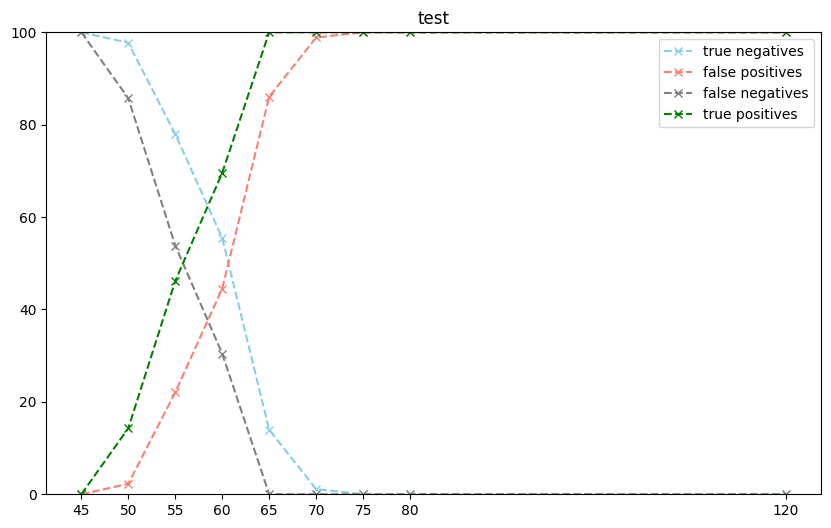

In [32]:
print_plot_01('test',precisions)

il modello sembra fittare bene tra i 45 e i 55 anni, prima sembra non riconoscere gli ictus (è anche vero che non sono presenti), dopo i 55 tende ad overfittare verso il rischio di ictus

In [33]:
precisions

[(45, np.float64(100.0), np.float64(0.0), np.float64(100.0), np.float64(0.0)),
 (50,
  np.float64(97.73584905660377),
  np.float64(2.2641509433962264),
  np.float64(85.71428571428571),
  np.float64(14.285714285714286)),
 (55,
  np.float64(77.95031055900621),
  np.float64(22.049689440993788),
  np.float64(53.84615384615385),
  np.float64(46.15384615384615)),
 (60,
  np.float64(55.477031802120145),
  np.float64(44.522968197879855),
  np.float64(30.434782608695652),
  np.float64(69.56521739130434)),
 (65,
  np.float64(13.944223107569721),
  np.float64(86.05577689243027),
  np.float64(0.0),
  np.float64(100.0)),
 (70,
  np.float64(1.1299435028248588),
  np.float64(98.87005649717514),
  np.float64(0.0),
  np.float64(100.0)),
 (75, np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0)),
 (80, np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0)),
 (120, np.float64(0.0), np.float64(100.0), np.float64(0.0), np.float64(100.0))]